# Import the necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import plot_tree

# Import and Explore the data

In [2]:
# Load the Excel file
data = pd.read_excel('TITANIC SURVIVAL PREDICTION.xlsx')

In [3]:
print(data.head())  # View the first few rows of the dataset

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
print(data['Survived'].value_counts())

0    266
1    152
Name: Survived, dtype: int64


In [5]:
print(data.info())# Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [6]:
print(data.describe())  # Summary statistics

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [7]:
print(data.isnull().sum())  # Check for missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# Save the modified data back to Excel
data.to_excel('TITANIC SURVIVAL PREDICTION.xlsx', index=False)

# Preprocessing the data

In [9]:
# Convert categorical variables to numerical (e.g., gender to binary)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Exploratory Data Analysis(EDA) 

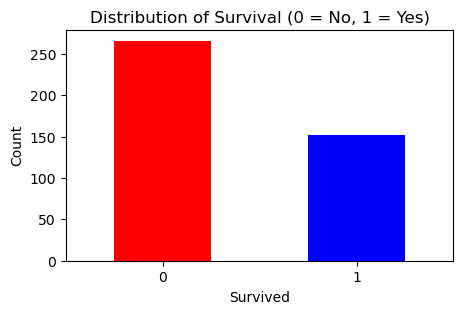

In [10]:
# Visualize the distribution of survival
plt.figure(figsize=(5, 3))
data['Survived'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Survival (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


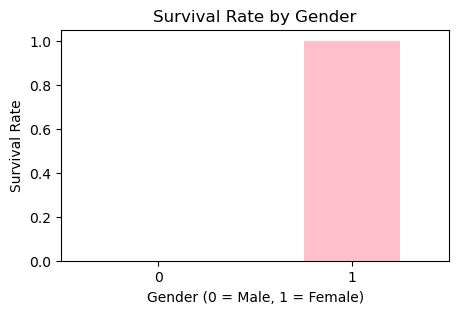

In [11]:
# Visualize the survival rate by gender
plt.figure(figsize=(5, 3))
data.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['purple', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

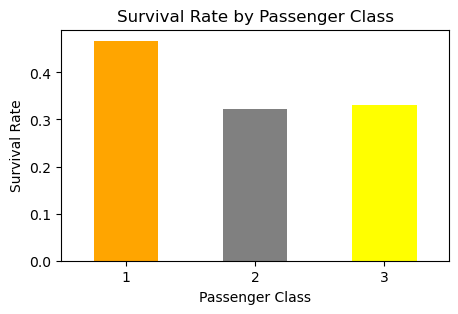

In [12]:
# Visualize the survival rate by passenger class
plt.figure(figsize=(5, 3))
data.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['orange', 'gray', 'yellow'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


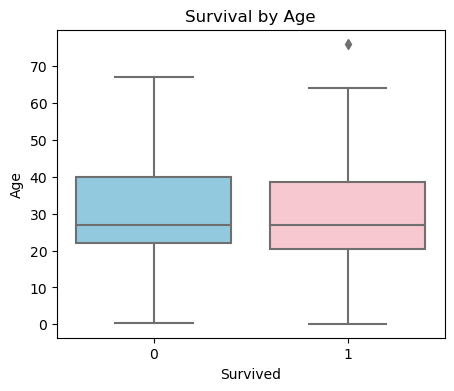

In [13]:
# Visualize the relationship between age and survival
plt.figure(figsize=(5, 4))
sns.boxplot(x='Survived', y='Age', data=data, palette=['skyblue', 'pink'])
plt.title('Survival by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

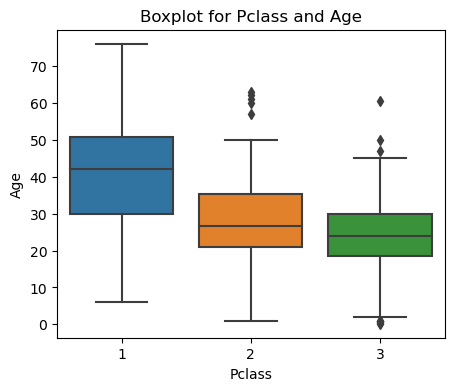

In [14]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Boxplot for Pclass and Age')
plt.show()



In [15]:
# For demonstration, I'll create a sample dataset with a few rows
data = pd.DataFrame({
    'Pclass': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'Sex': [0, 1, 1, 0, 1, 0, 1, 0, 1],
    'Age': [22, 38, 26, 35, 29, 21, 48, 50, 22],
    'SibSp': [1, 1, 0, 1, 0, 0, 1, 0, 0],
    'Parch': [0, 0, 0, 1, 0, 0, 1, 0, 0],
    'Fare': [71.2833, 26.55, 7.925, 53.1, 13.0, 7.75, 76.7292, 28.7125, 7.25],
    'Embarked': [1, 0, 1, 1, 0, 1, 1, 0, 1],
    'Survived': [1, 1, 0, 1, 0, 1, 0, 1, 0]
})


In [16]:
# Separate features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [19]:
# Train the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [20]:
# Make predictions on the testing data
predictions = clf.predict(X_test)

In [21]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

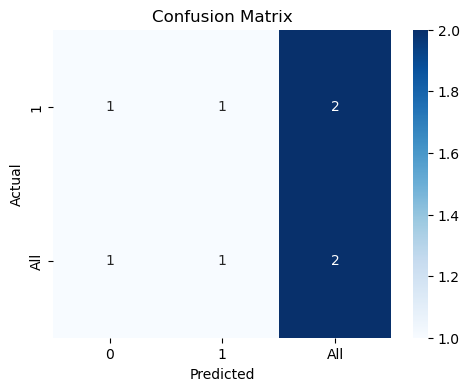

In [22]:
# Plot confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True), annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')

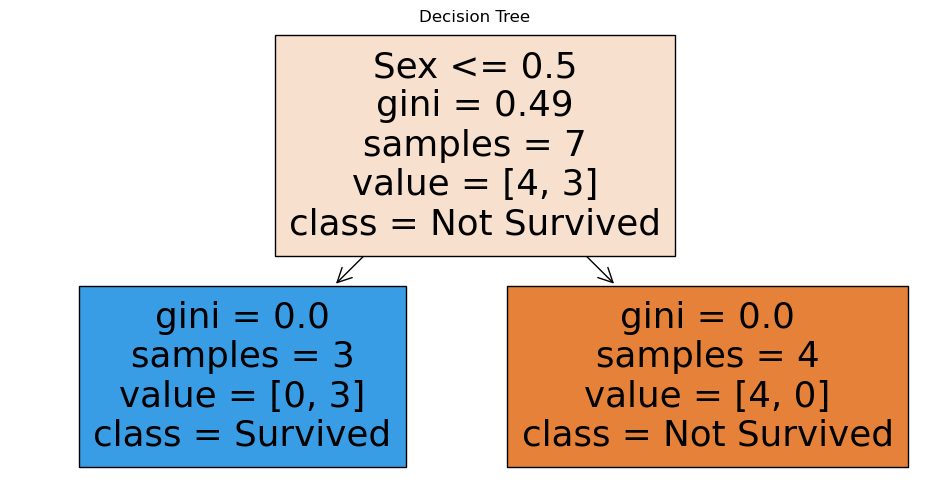

In [23]:
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.title('Decision Tree')
plt.show()

# Prediction using Decision Tree Classifier

In [24]:
# Separate features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

In [25]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [26]:
# Train the classifier on the entire dataset
clf.fit(X, y)


DecisionTreeClassifier()

In [57]:
# Take the first row of the dataset for prediction
sample_passenger = data.iloc[[4]]

In [58]:
# Extract features for prediction
user_input = sample_passenger.drop('Survived', axis=1)

In [59]:
# Make prediction for the user-input data
prediction = clf.predict(user_input)

In [60]:
# Display prediction
if prediction[0] == 1:
    print("Prediction: Survived")
else:
    print("Prediction: Not Survived")

Prediction: Not Survived
